In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My\ Drive/colab/CSCE676/Project/

/content/gdrive/My Drive/colab/CSCE676/Project


In [ ]:
import pandas as pd
import numpy as np
# reading csv files
colTitles = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
             'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
data = pd.read_csv('adult.data', sep=",",names=colTitles)
# data = data.drop(columns=['fnlwgt','education','relationship','capital-gain','capital-loss'])
data = data.drop(columns=['fnlwgt', 'capital-gain','capital-loss'])


rows = data.shape[0]
for row in range(rows):
    if data.iloc[row,-1] == ' <=50K':
        data.iloc[row,-1] = 0
    else:
        data.iloc[row,-1] = 1

data

age          workclass  ...  native-country  income
0       39          State-gov  ...   United-States       0
1       50   Self-emp-not-inc  ...   United-States       0
2       38            Private  ...   United-States       0
3       53            Private  ...   United-States       0
4       28            Private  ...            Cuba       0
...    ...                ...  ...             ...     ...
32556   27            Private  ...   United-States       0
32557   40            Private  ...   United-States       1
32558   58            Private  ...   United-States       0
32559   22            Private  ...   United-States       0
32560   52       Self-emp-inc  ...   United-States       1

[32561 rows x 12 columns]

In [ ]:
# remove all spaces and remove rows that contains ?
for i in range(12):
    if i not in [0,3,9,11]:
        data.iloc[:,i] = data.iloc[:,i].str.strip()
    data = data[data.iloc[:, i] != '?']

# only retains data entry that are United-States
# data = data[data['native-country'] == 'United-States']

In [ ]:
data

age         workclass   education  ...  hours-per-week native-country income
0       39         State-gov   Bachelors  ...              40  United-States      0
1       50  Self-emp-not-inc   Bachelors  ...              13  United-States      0
2       38           Private     HS-grad  ...              40  United-States      0
3       53           Private        11th  ...              40  United-States      0
4       28           Private   Bachelors  ...              40           Cuba      0
...    ...               ...         ...  ...             ...            ...    ...
32556   27           Private  Assoc-acdm  ...              38  United-States      0
32557   40           Private     HS-grad  ...              40  United-States      1
32558   58           Private     HS-grad  ...              40  United-States      0
32559   22           Private     HS-grad  ...              20  United-States      0
32560   52      Self-emp-inc     HS-grad  ...              40  United-States      1

[30162 rows x 12 columns]

In [ ]:
# classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = data.iloc[:,:-1].values
X_original = X.copy()
y = data.iloc[:,-1].values
sc = StandardScaler()
X[:,0:1] = sc.fit_transform(X[:,0:1])
X[:,3:4] = sc.fit_transform(X[:,3:4])
X[:,9:10] = sc.fit_transform(X[:,9:10])

In [ ]:
# One Hot encoding categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,10])], remainder='passthrough')
X = ct.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y, test_size = 0.25, random_state = 0)


In [ ]:
X_train_data = np.concatenate((X_train_original, y_train_original.reshape(len(y_train_original),1)), 1)
X_test_data = np.concatenate((X_test_original, y_test_original.reshape(len(y_test_original),1)), 1)

In [ ]:
# Training the Logistic Regression model on the Training set
y_train = y_train.astype('int')
y_test = y_test.astype('int')
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
classifier.coef_

array([[ 0.7602962 , -0.04366049,  0.26471946,  0.41484653, -0.24037476,
        -0.17050784, -0.9992124 ,  0.06480912, -0.07916497, -0.16929627,
         0.37830186,  0.15765426,  0.16629334, -0.24627495, -0.49589615,
        -0.23698841, -0.02673159,  0.1746378 , -0.04412719,  0.15367297,
        -0.26769486,  0.52711861, -0.07020687, -0.49246556,  1.54967784,
         1.26491854, -0.54124671, -0.95623697, -0.4999693 , -0.33857113,
         0.10377352, -0.37852324,  0.163711  ,  0.9400528 , -0.82275823,
        -0.58548094, -0.23065948, -0.72989301, -0.95819551,  0.62503903,
         0.7060289 ,  0.40187018,  0.77790645, -0.02676477,  0.05299561,
         0.21319861, -0.69848441, -0.95166058,  0.06011733,  1.30994014,
        -0.24507074,  0.37128046,  0.04773011, -0.33316032,  0.14532719,
        -0.4137057 ,  0.39981241,  1.09398832,  0.33993756, -0.49891504,
        -1.11700423,  0.88269874, -1.24807456, -0.09416973,  0.09875412,
         0.76647689,  0.36901265,  0.58417228, -0.3

In [ ]:
# Predicting the Test set results
y_predict = classifier.predict(X_test)
np.set_printoptions(precision=2)
compare = np.concatenate((y_test.reshape(len(y_test),1), y_predict.reshape(len(y_predict),1)),1)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print('class 0, class 1')
print(cm)
score = accuracy_score(y_test, y_predict)
print('accuracy_score = ', score)

class 0, class 1
[[5160  479]
 [ 835 1067]]
accuracy_score =  0.8257525527118419


In [ ]:
# visualizing the logistic classification results
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# X1 = X_test_original[:,2]   # num years of education
# X2 = X_test_original[:,7]   # working hours per week
# plt.figure(figsize=[15, 10])
# plt.xlim(X1.min()-2, X1.max()+2)
# plt.ylim(X2.min()-10, X2.max()+10)
# for i, j in enumerate(np.unique(y_test)):
#     plt.scatter(X1[y_test == j], X2[y_test == j], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('num years of education')
# plt.ylabel('working hours per week')
# plt.legend()
# plt.show()

In [ ]:
# visualization with seaborn
# import seaborn as sns
# plt.figure()
# sns.set_theme(style="ticks", color_codes=True)
# # profession and num of hours per week
# data1 = np.concatenate((X_test_original[:,4].reshape(len(X_test_original[:,4]),1),
#                        X_test_original[:,7].reshape(len(X_test_original[:,7]),1),
#                        y_test.reshape(len(y_test),1)), 1)
# data1 = pd.DataFrame(data1, columns=['Professions', 'Hours-per-week', 'Income>=50k'])
# # sns.catplot(x="Professions", y="Hours-per-week", hue="Income>=50k", kind="swarm", data=data1, s=10)
# sns.stripplot(x="Professions", y="Hours-per-week", hue="Income>=50k", data=data1, s=10)
# plt.gcf().set_size_inches(30, 15)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [ ]:
headers = list(data.columns.values)
print(headers)

['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country', 'income']


In [ ]:
X_test_data = pd.DataFrame(X_test_data, columns=[*headers[:-1], 'Income>=50k'])

In [ ]:
X_test_data

age         workclass  ... native-country Income>=50k
0     44           Private  ...  United-States           0
1     21           Private  ...  United-States           0
2     36           Private  ...  United-States           0
3     30  Self-emp-not-inc  ...  United-States           0
4     42  Self-emp-not-inc  ...    El-Salvador           0
...   ..               ...  ...            ...         ...
7536  46           Private  ...          India           0
7537  23           Private  ...  United-States           0
7538  33           Private  ...  United-States           1
7539  73           Private  ...  United-States           0
7540  36           Private  ...  United-States           0

[7541 rows x 12 columns]

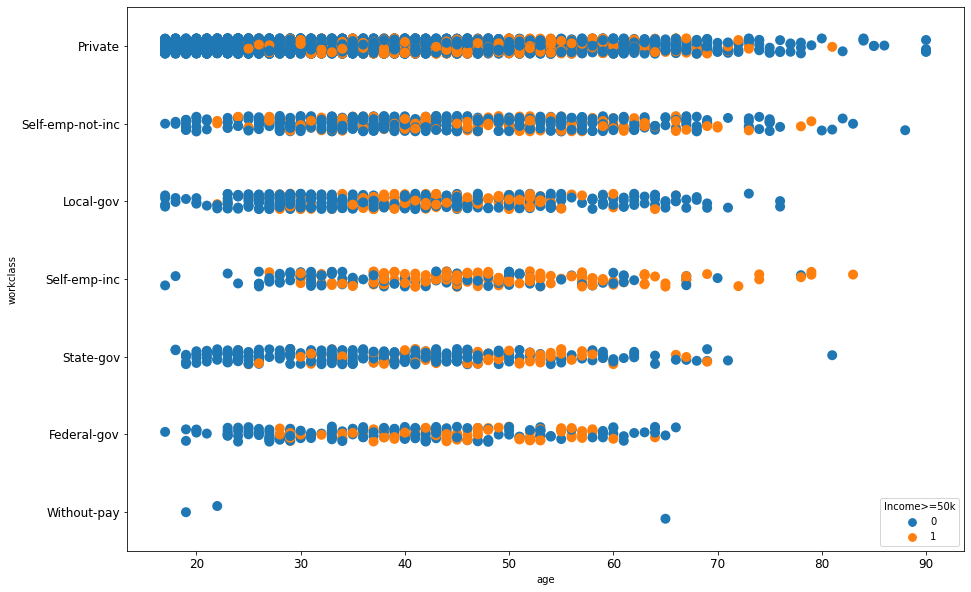

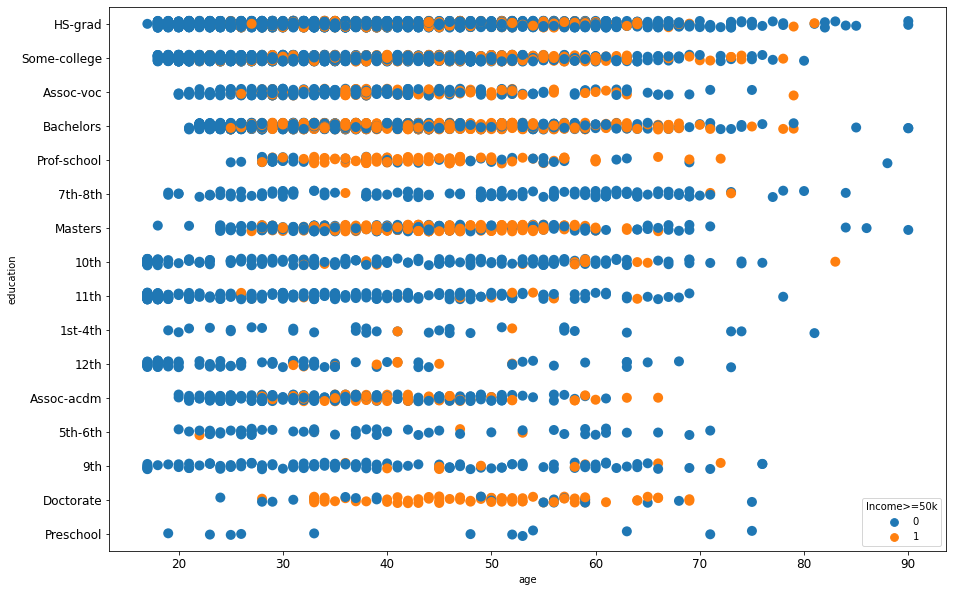

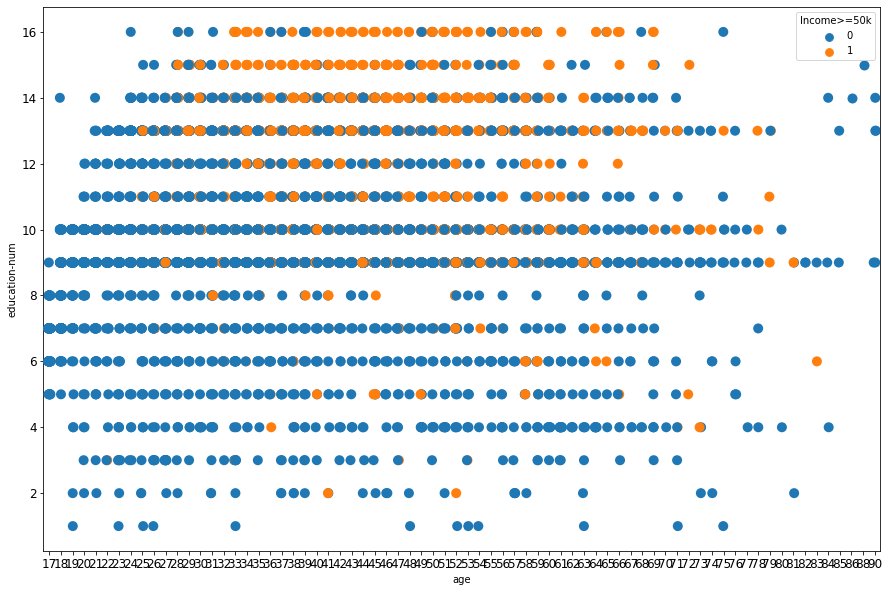

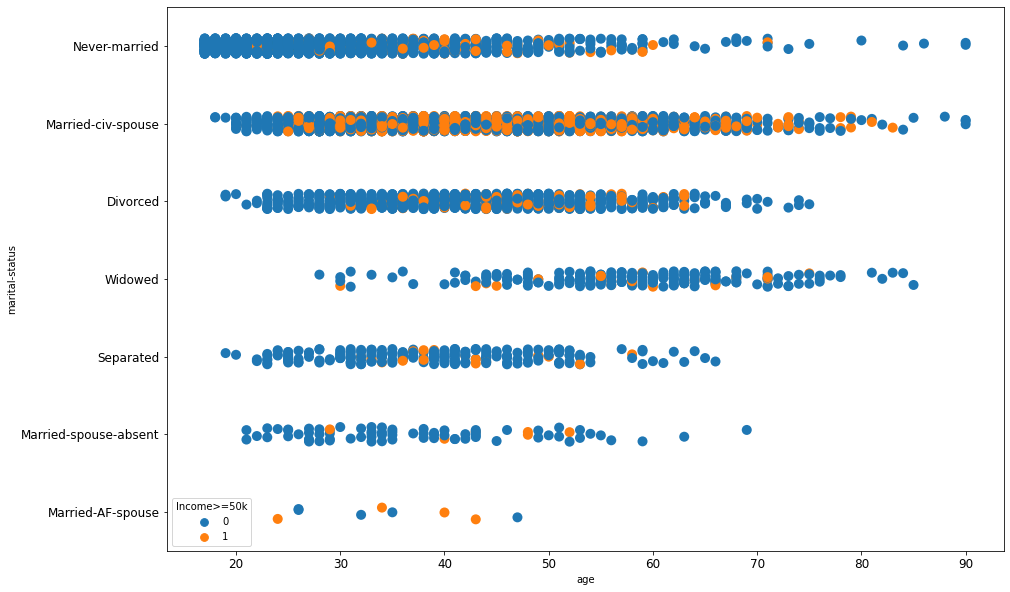

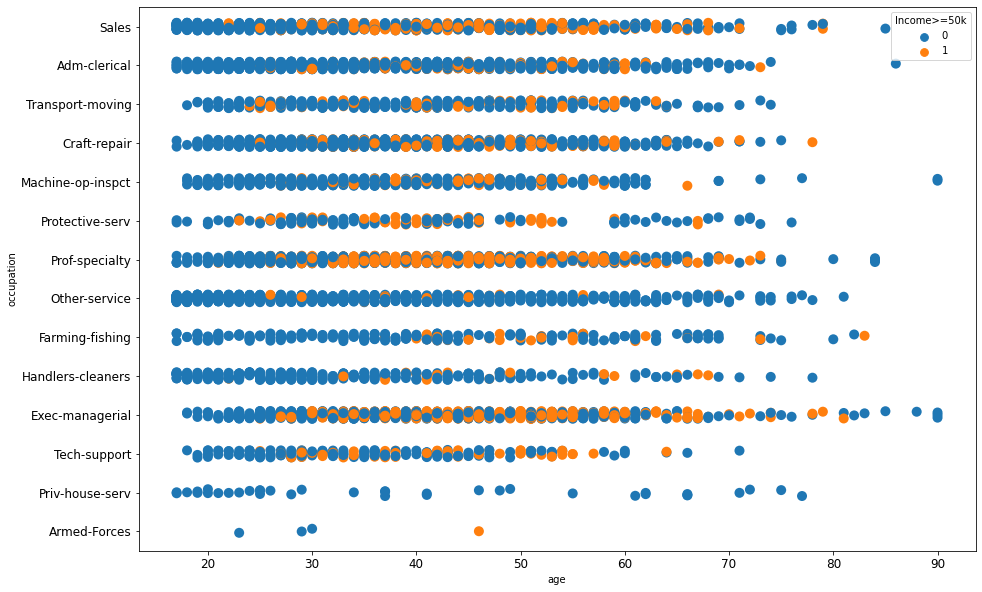

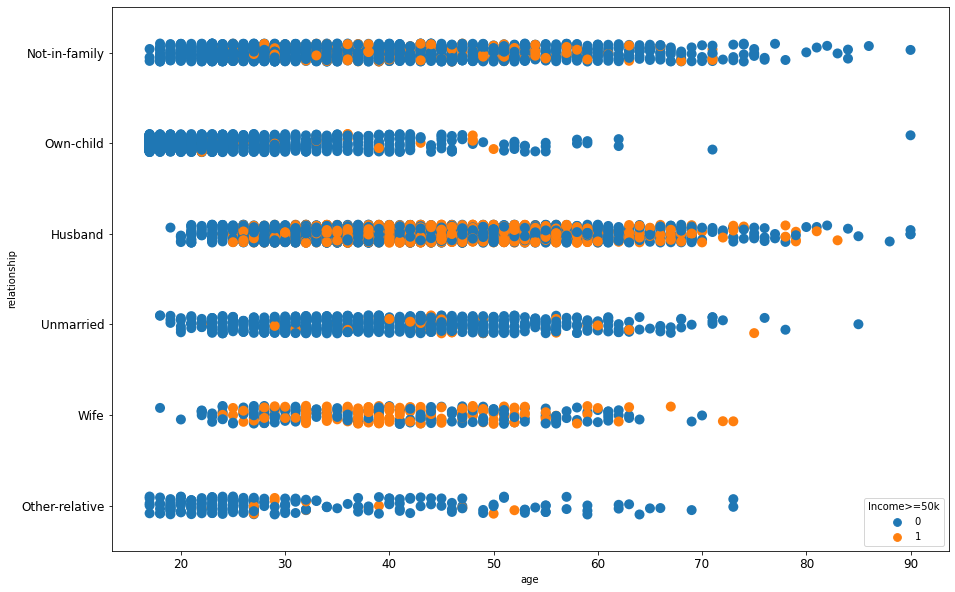

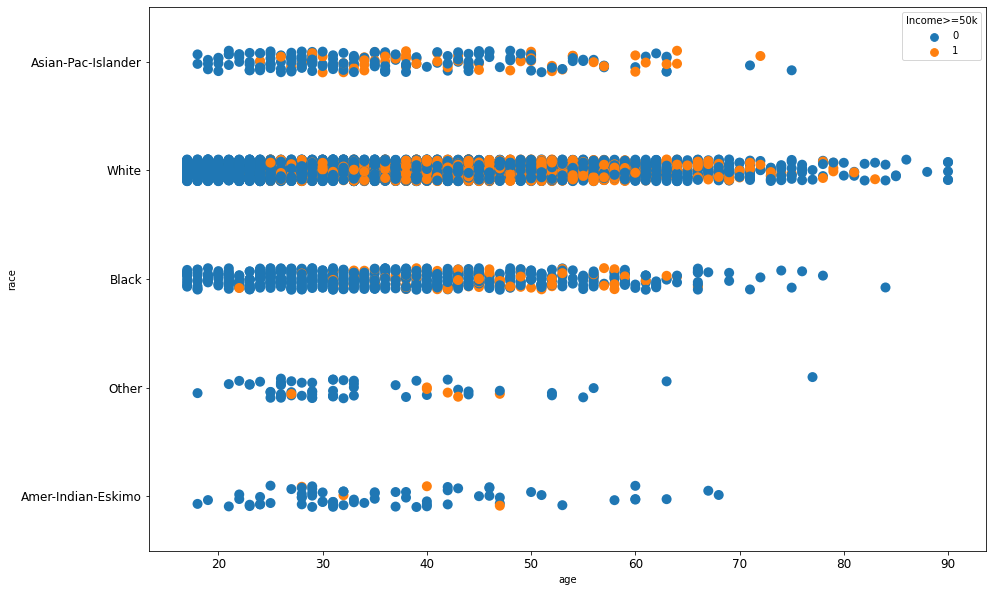

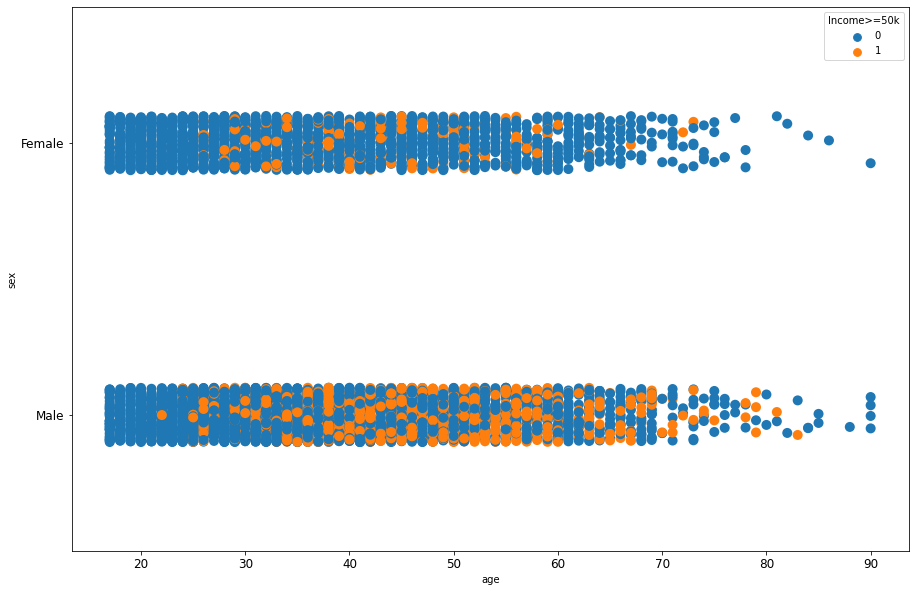

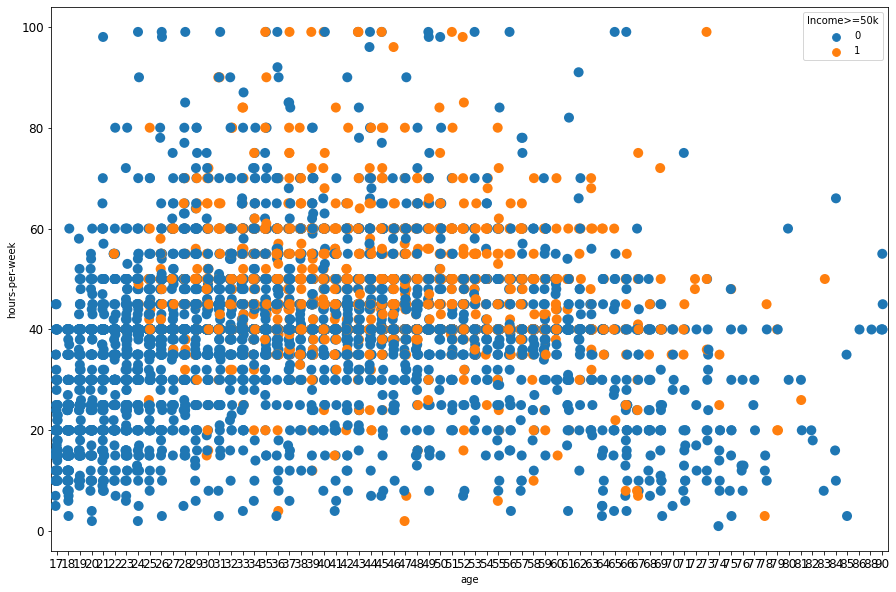

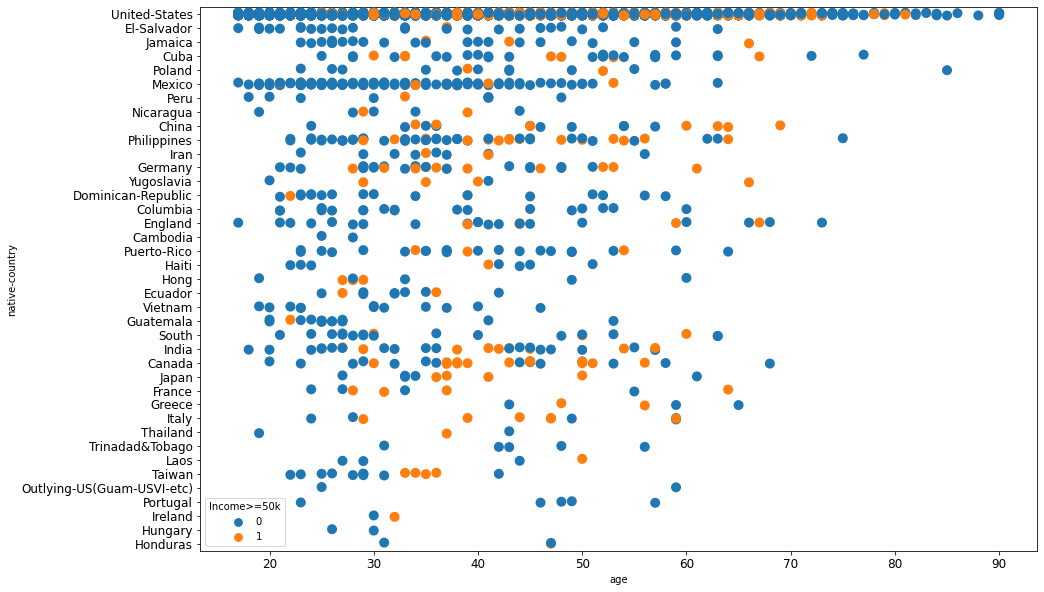

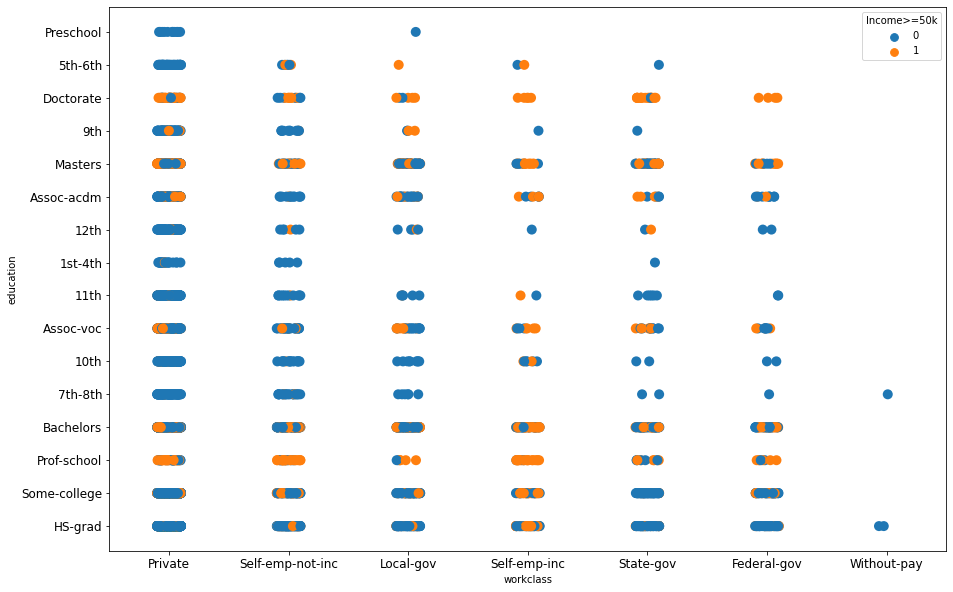

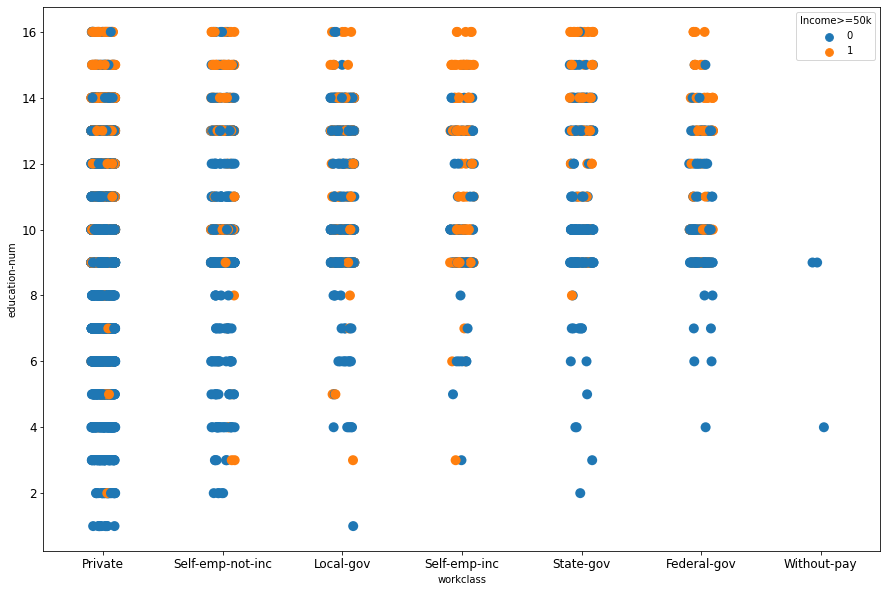

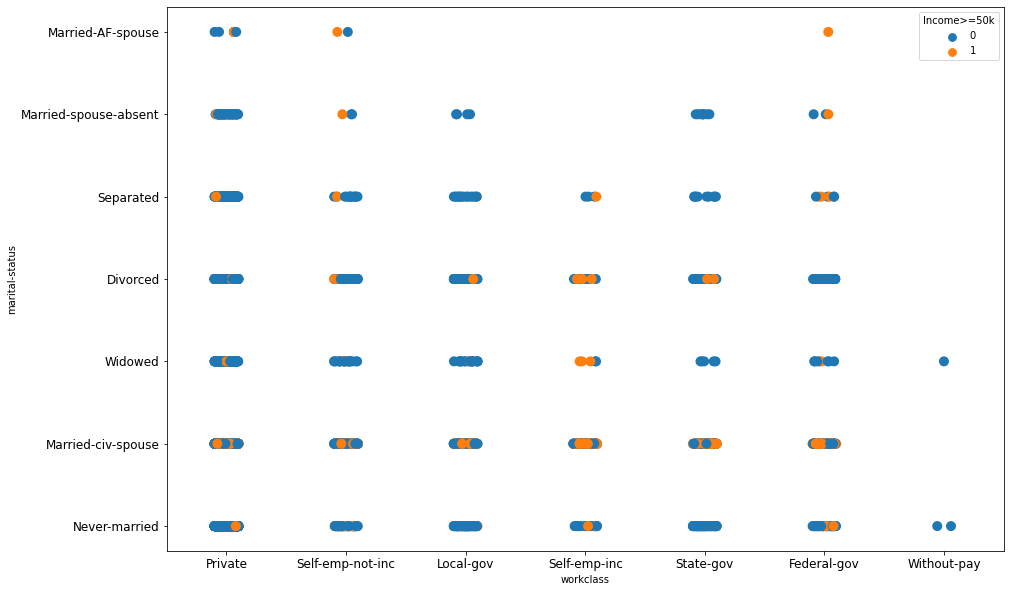

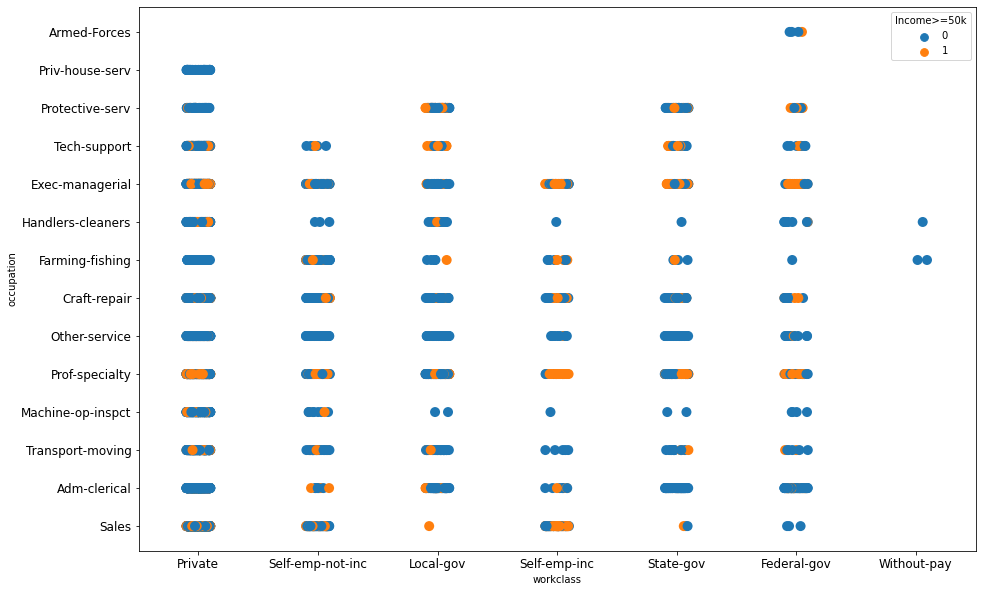

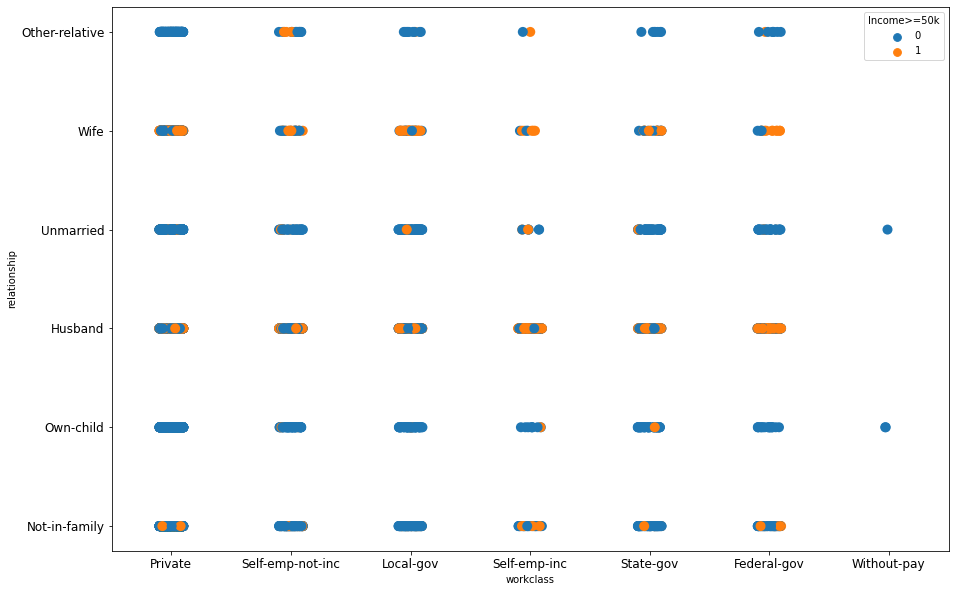

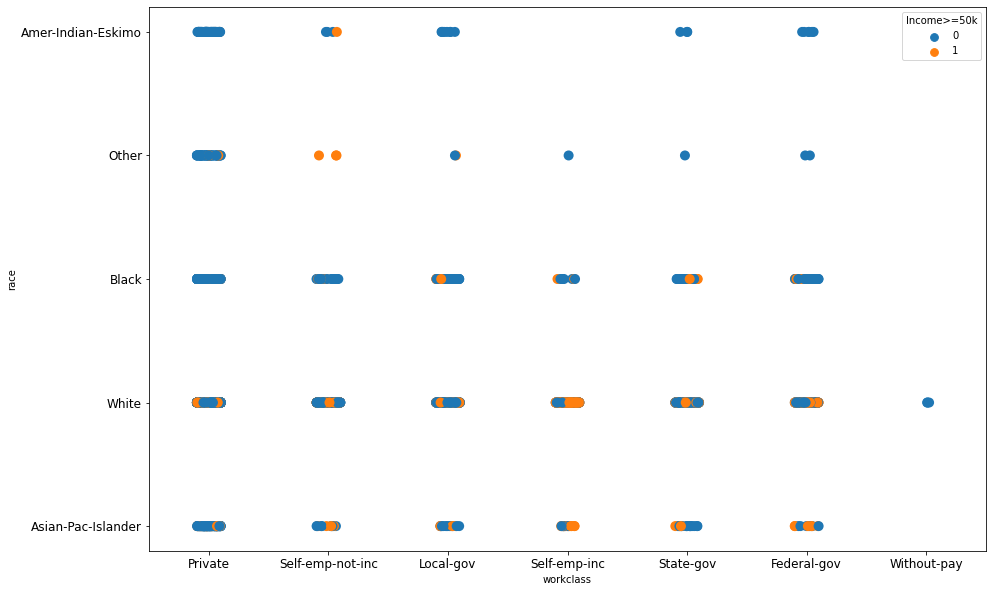

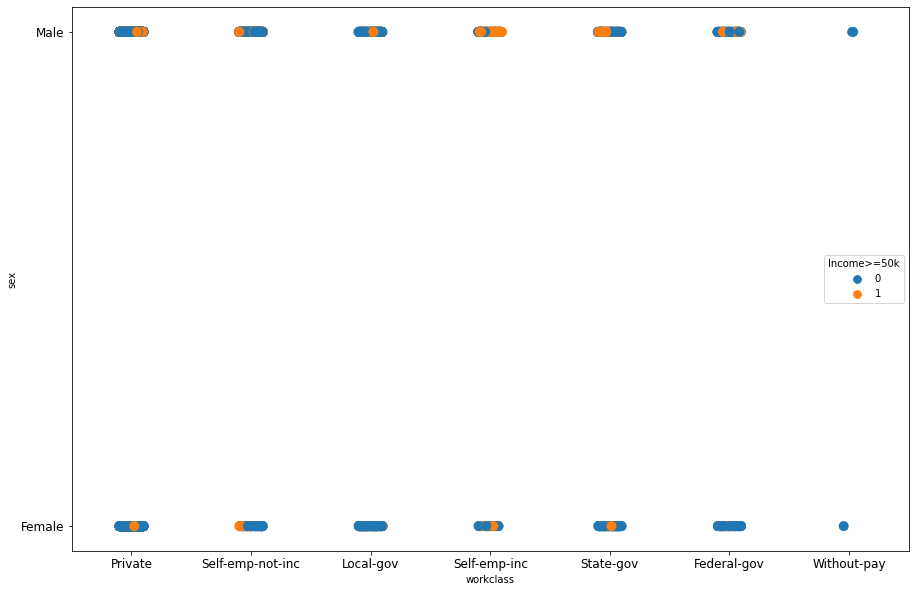

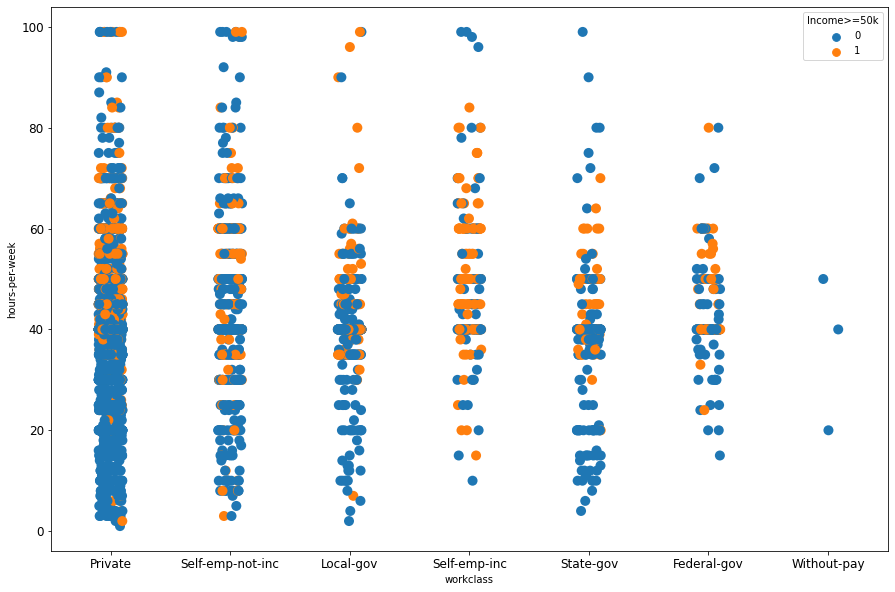

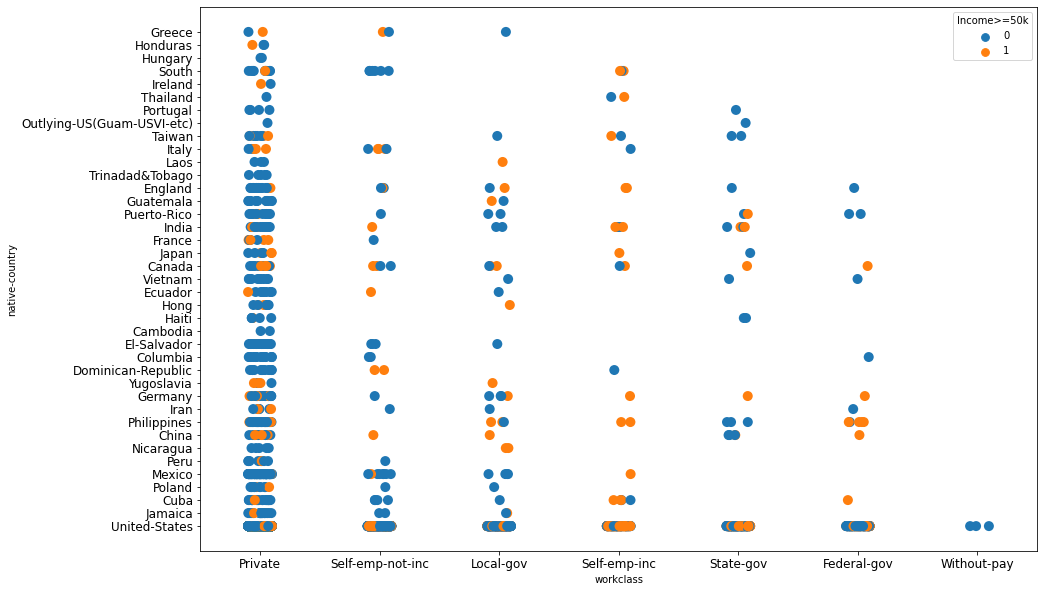

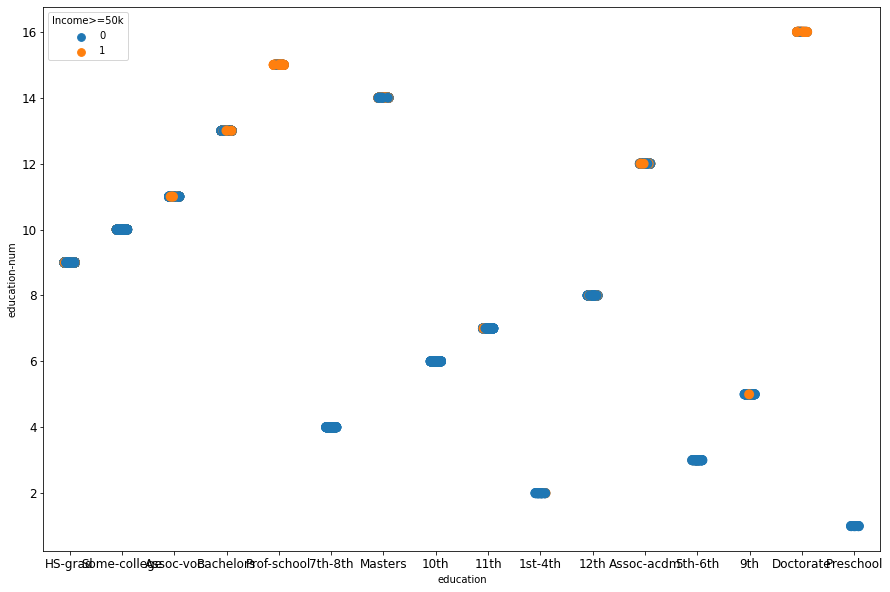

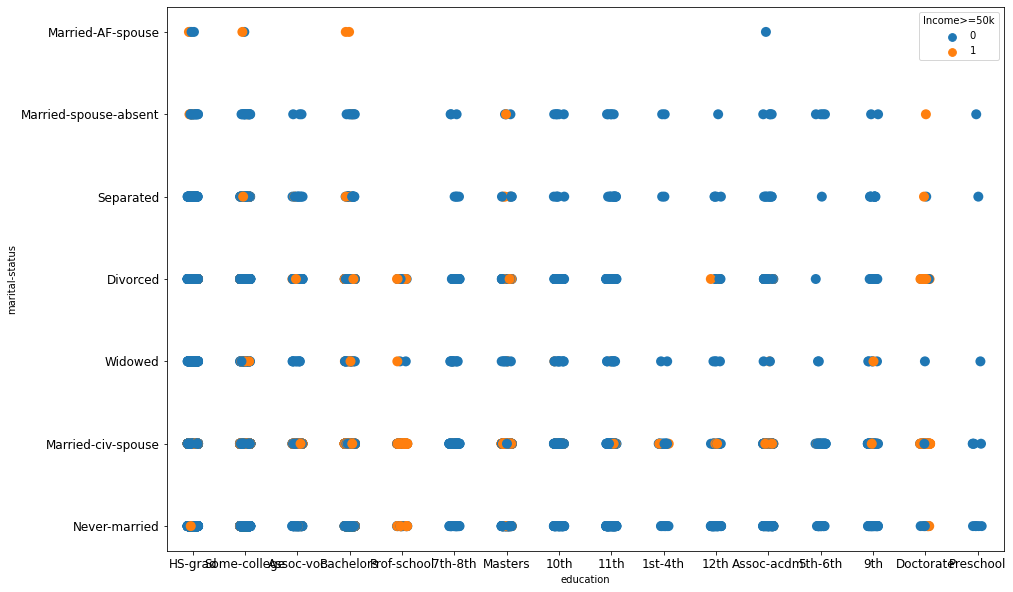

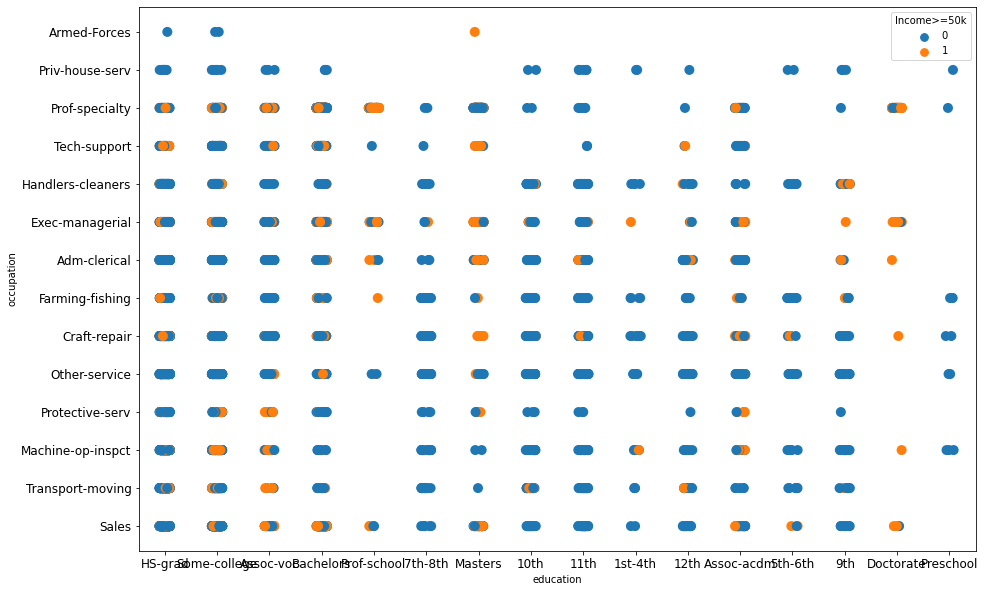

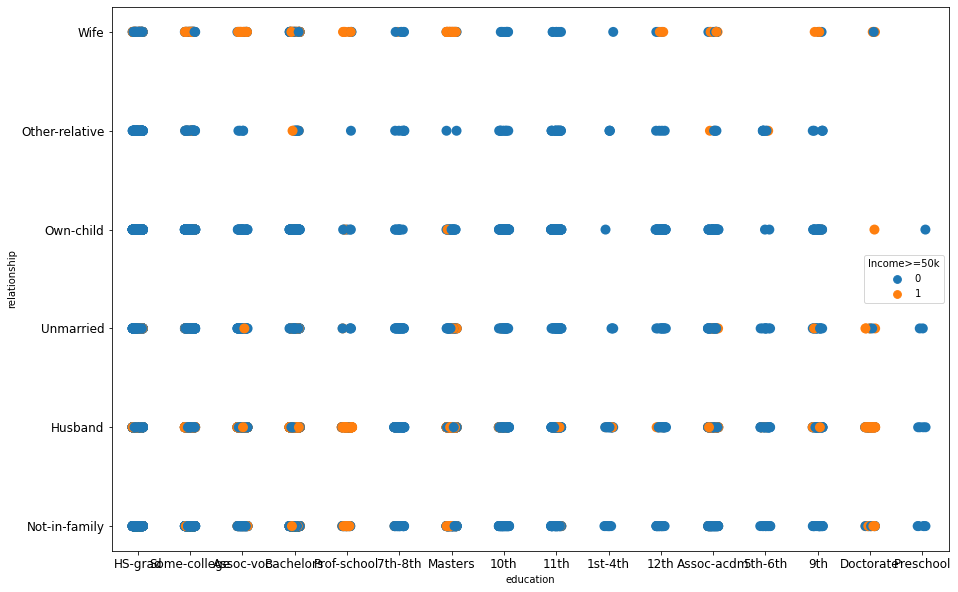

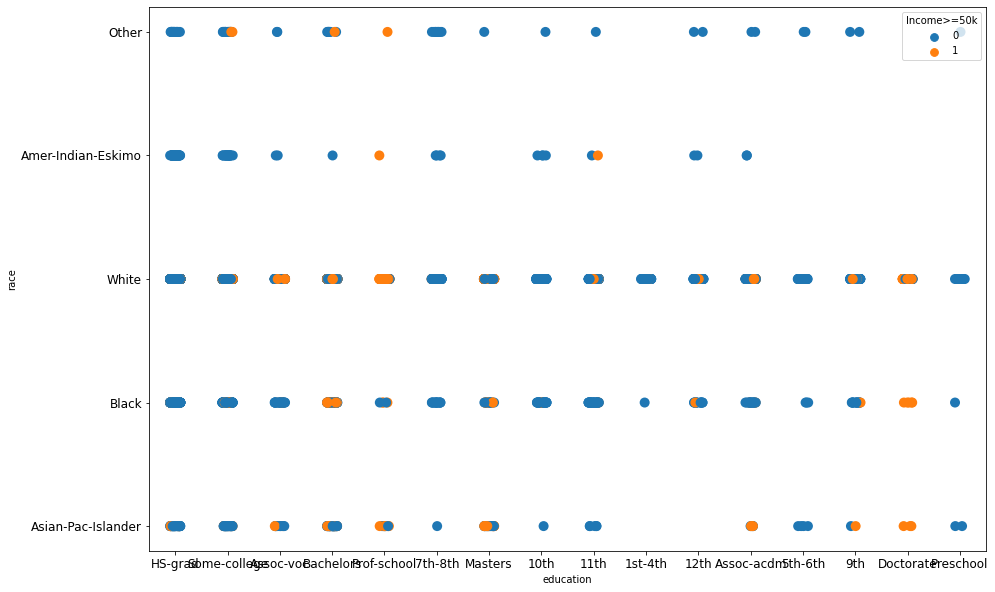

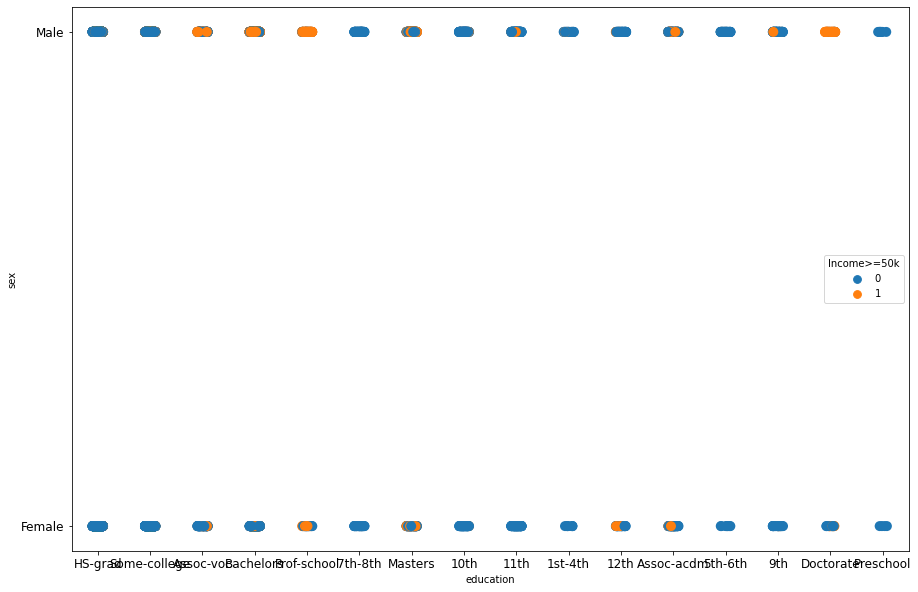

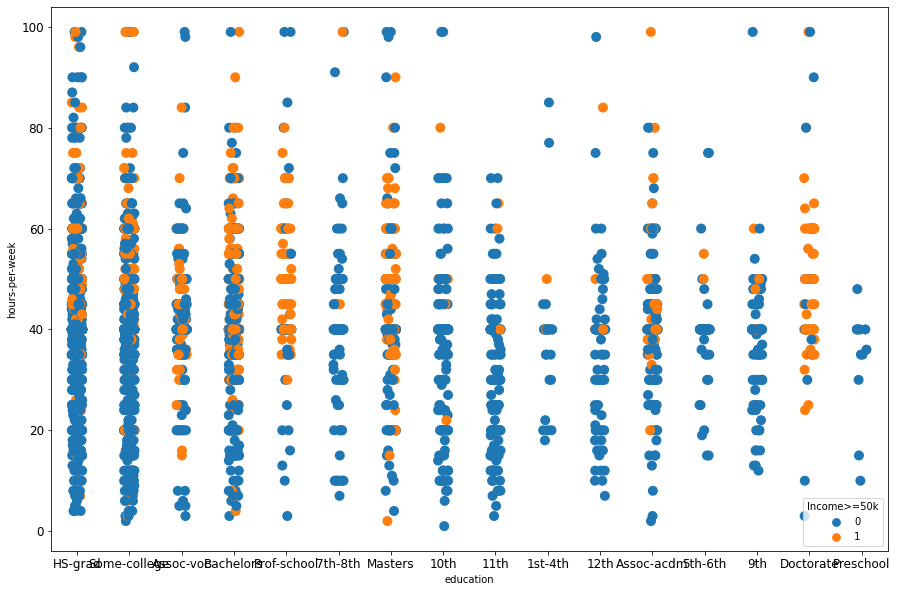

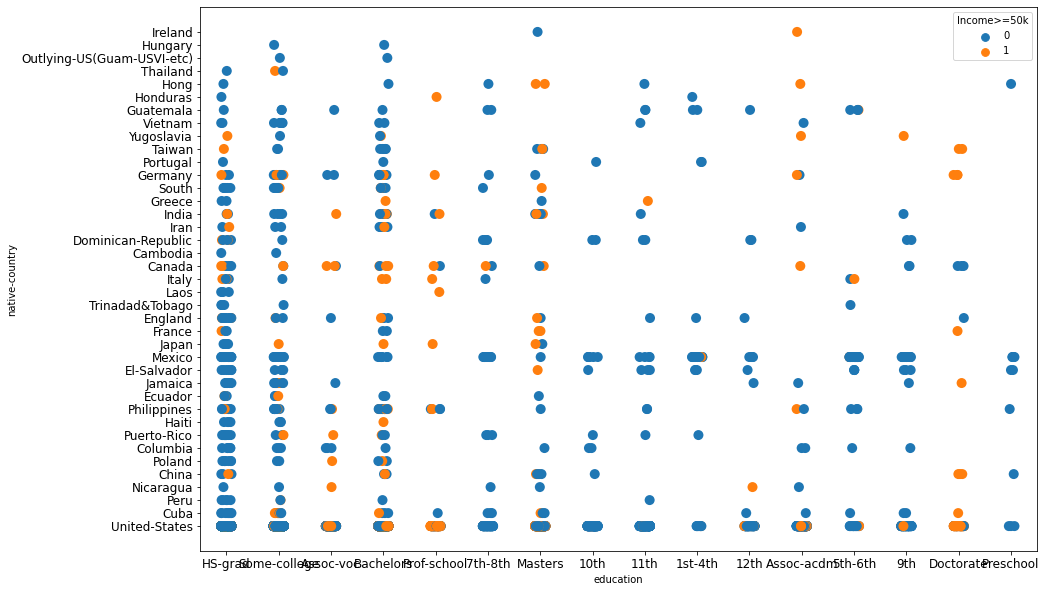

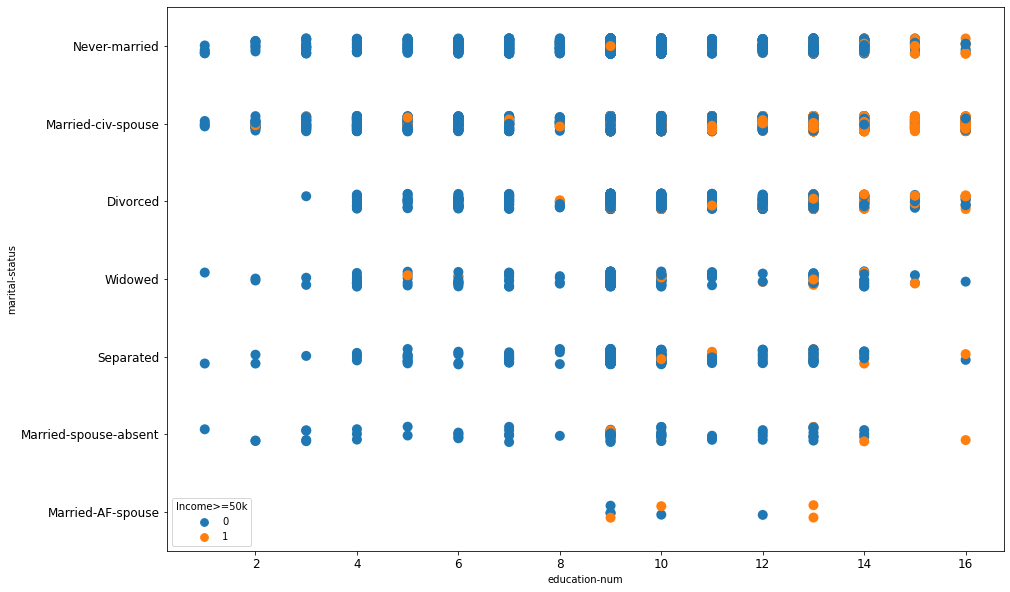

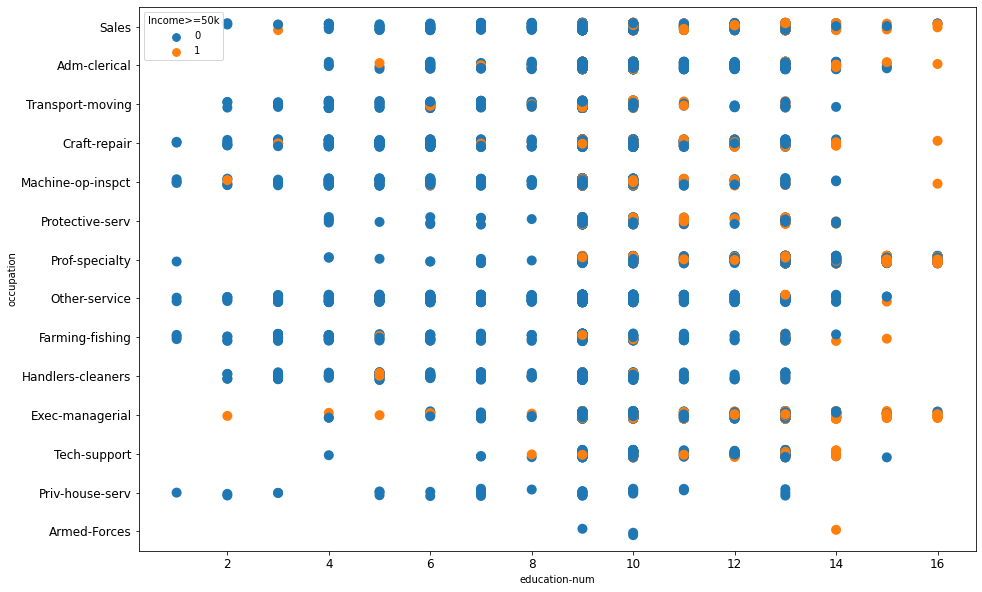

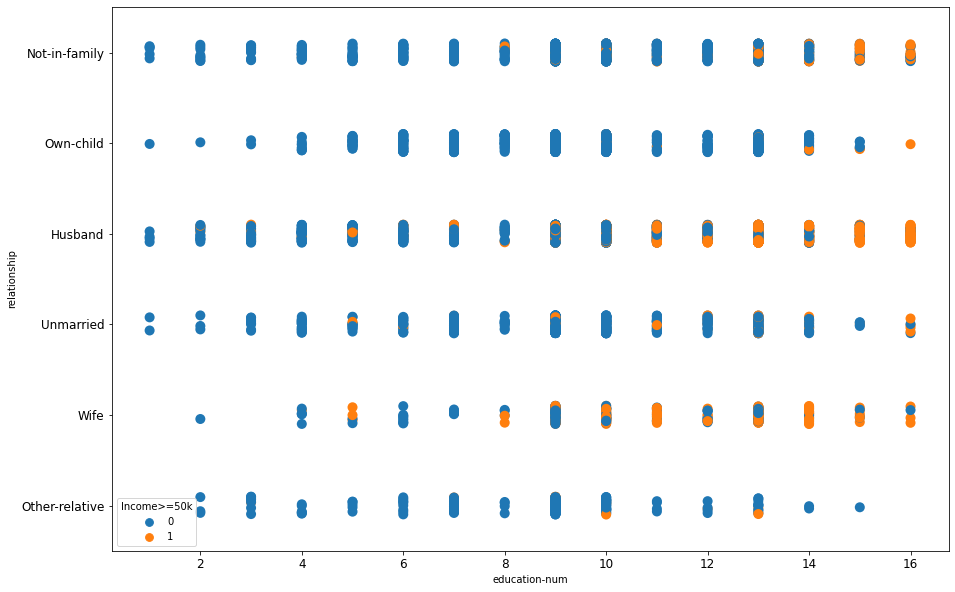

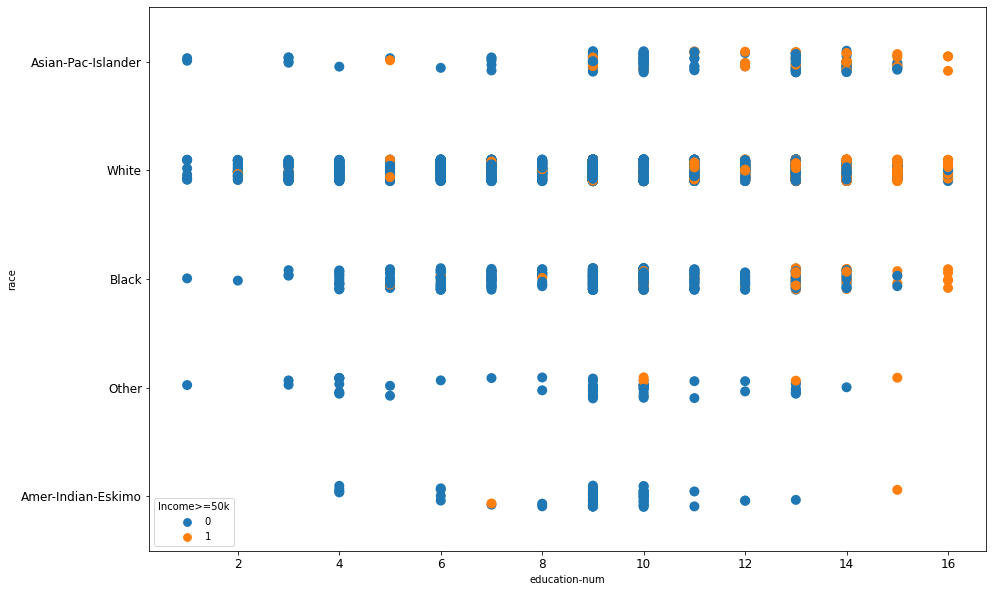

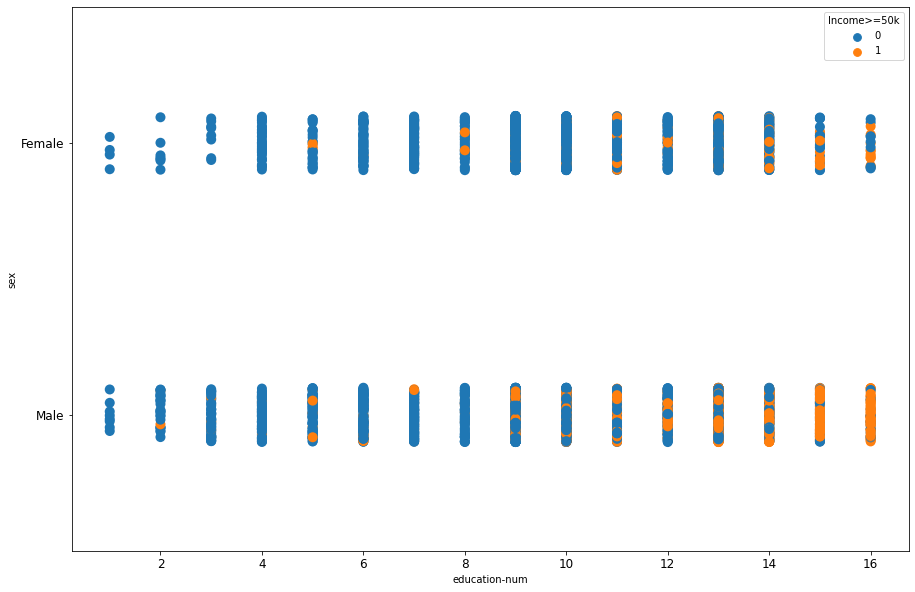

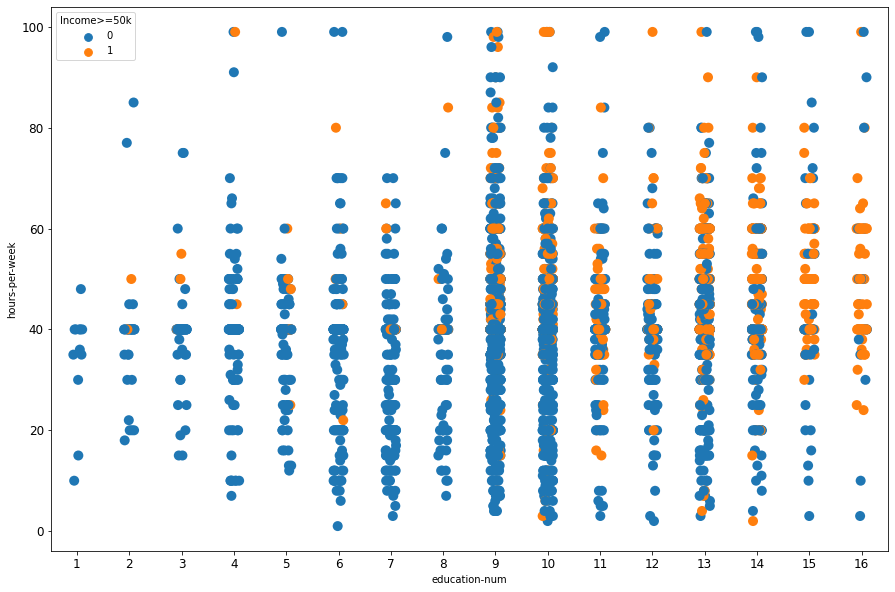

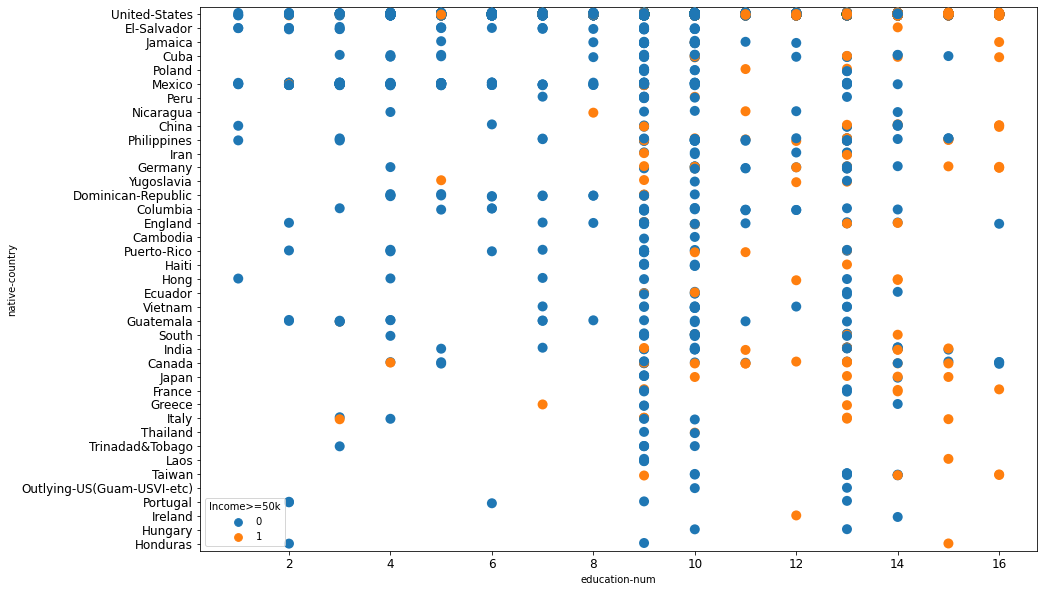

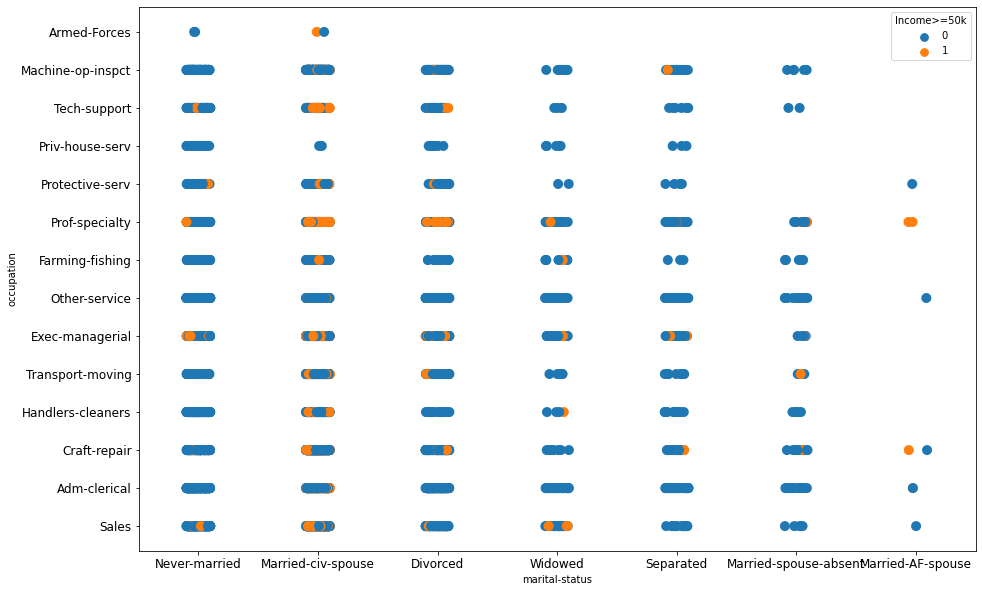

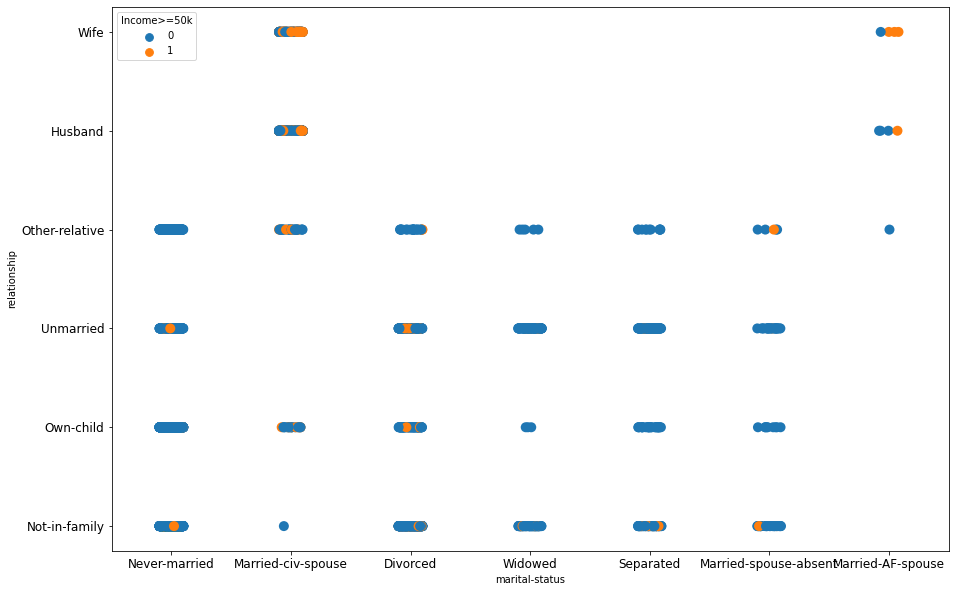

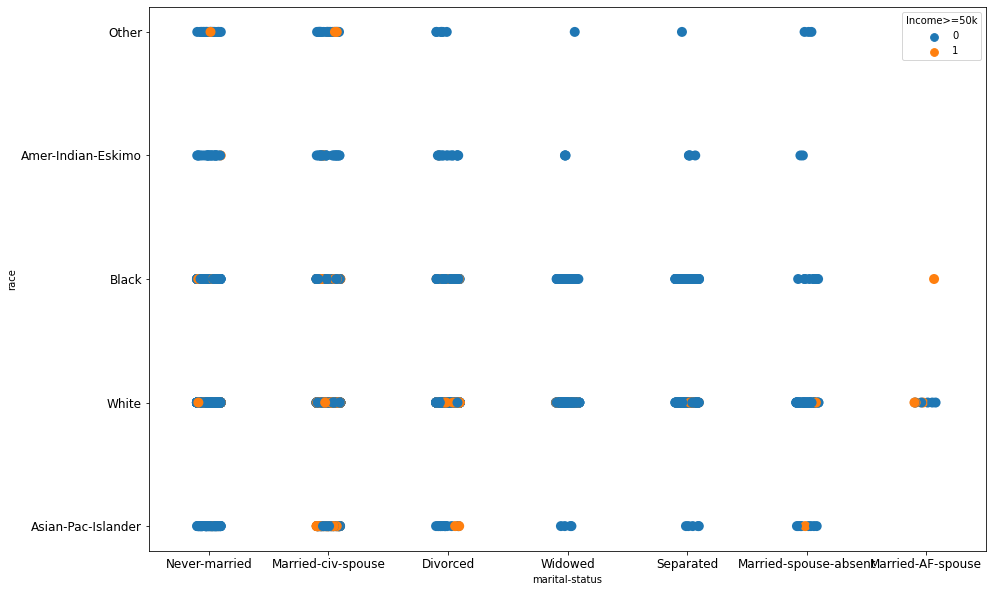

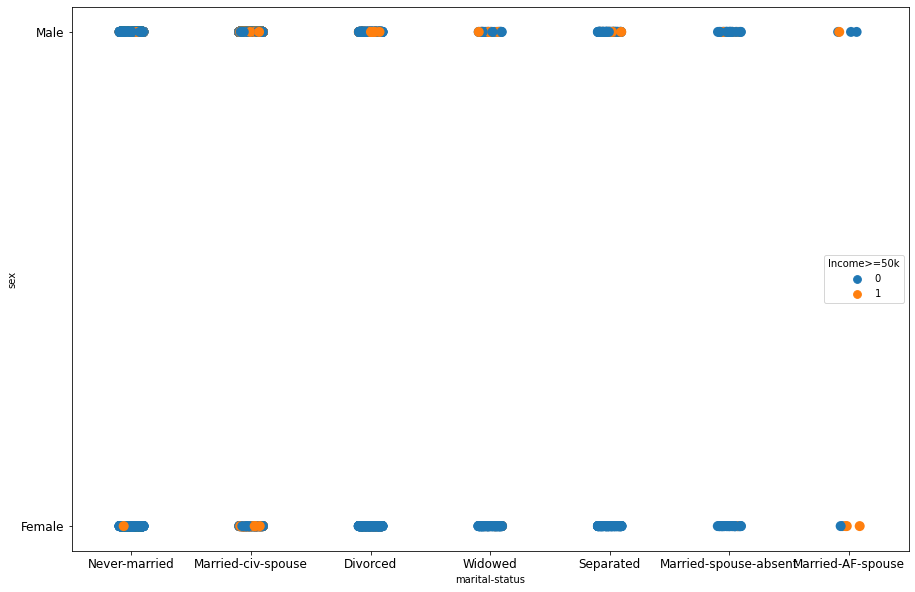

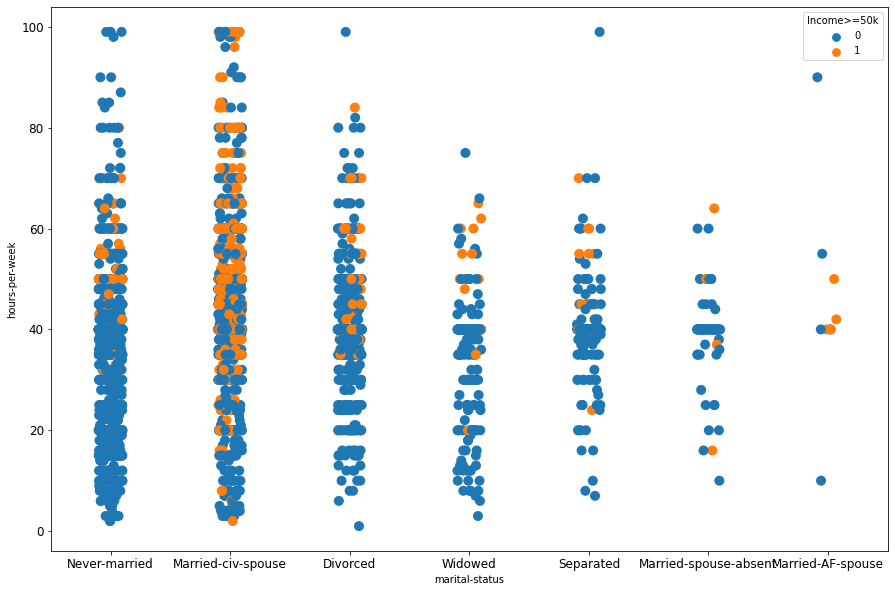

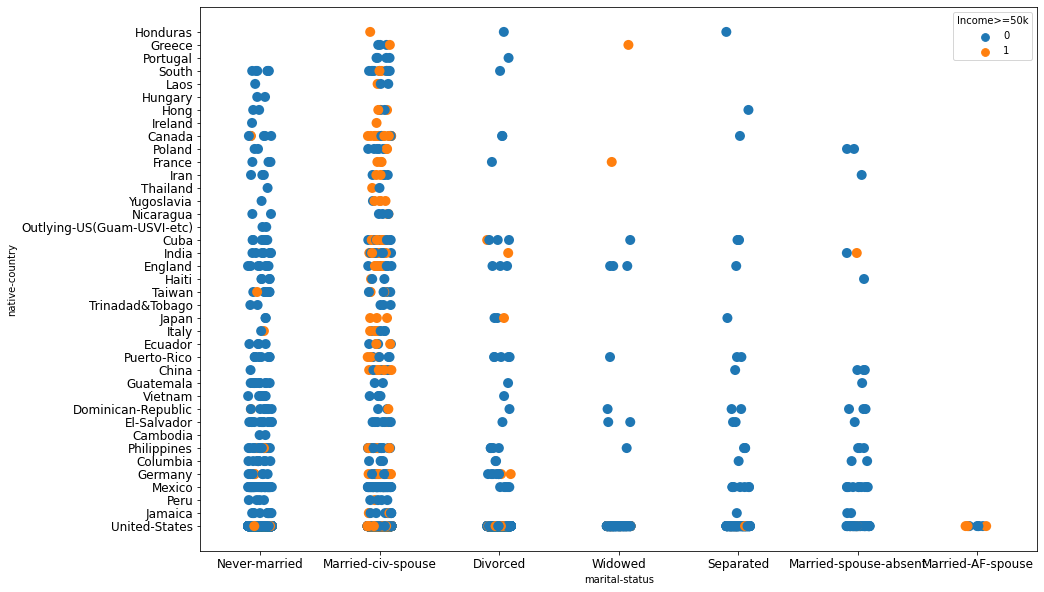

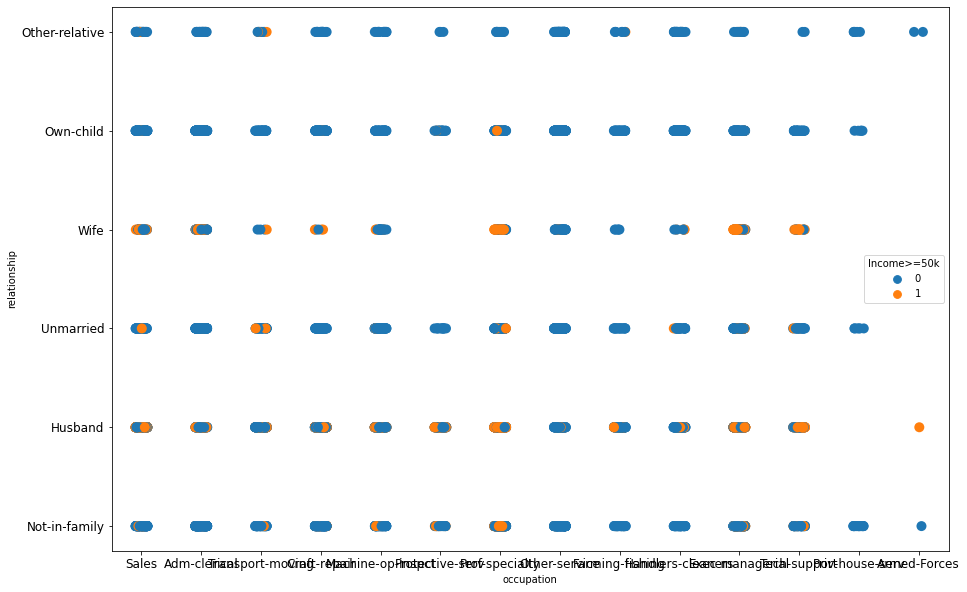

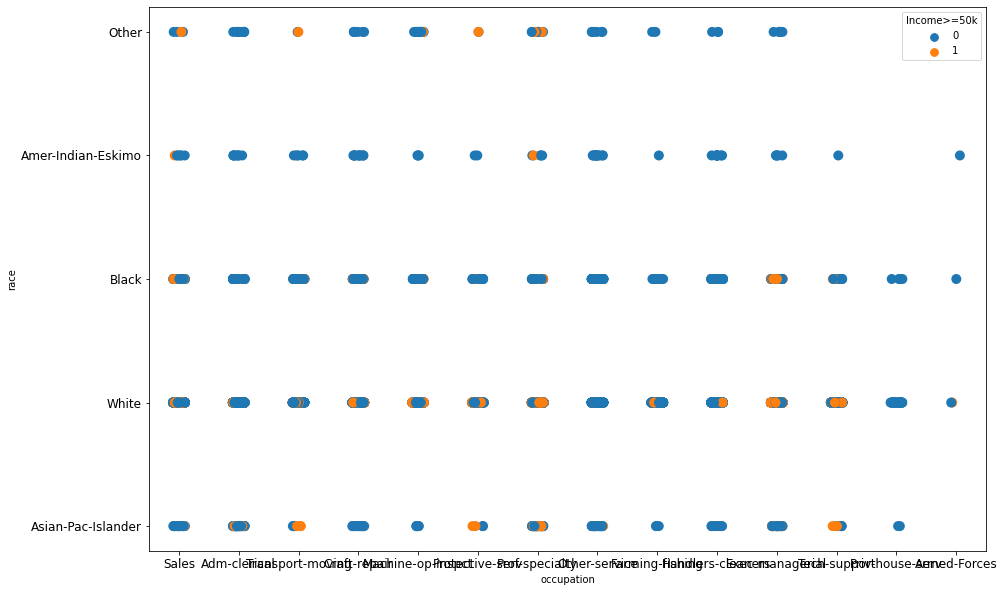

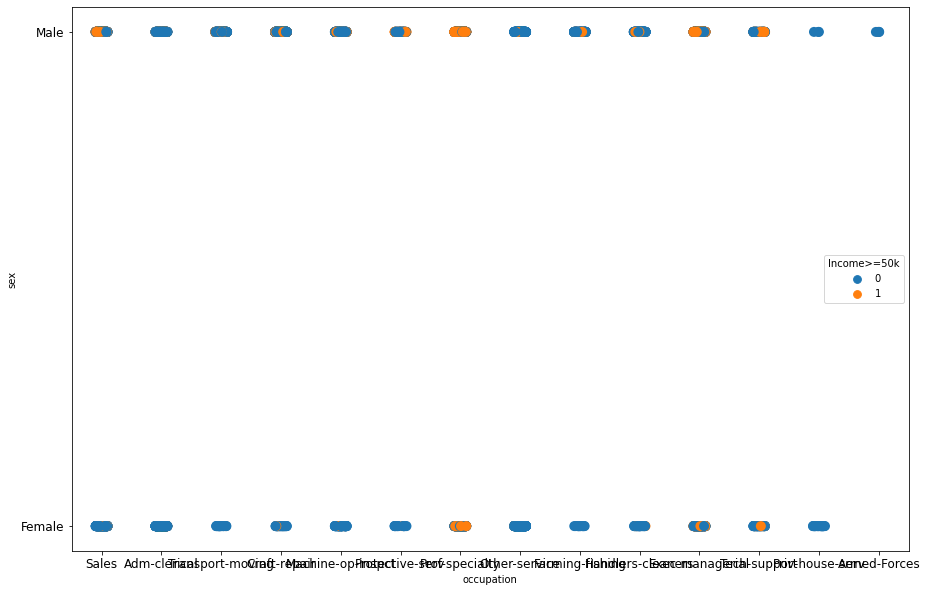

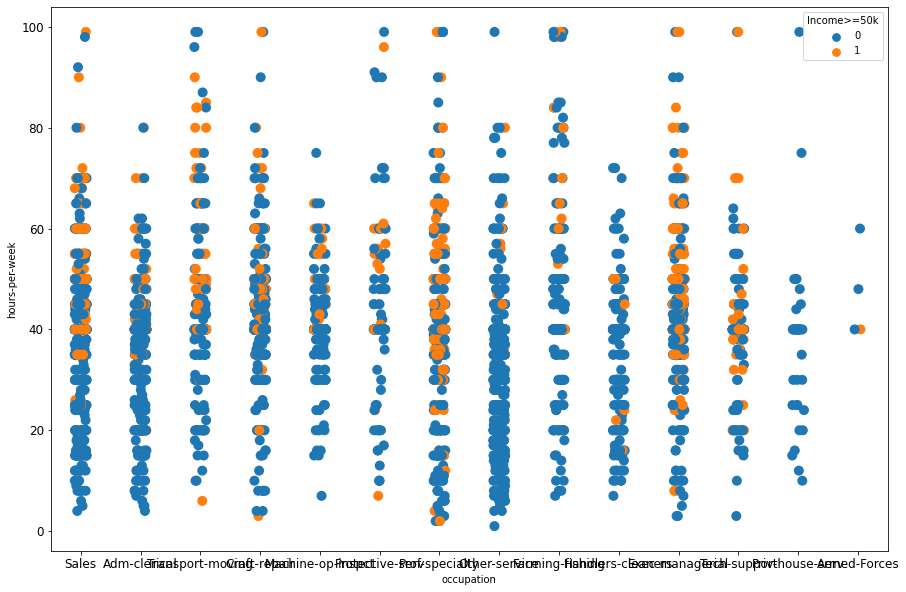

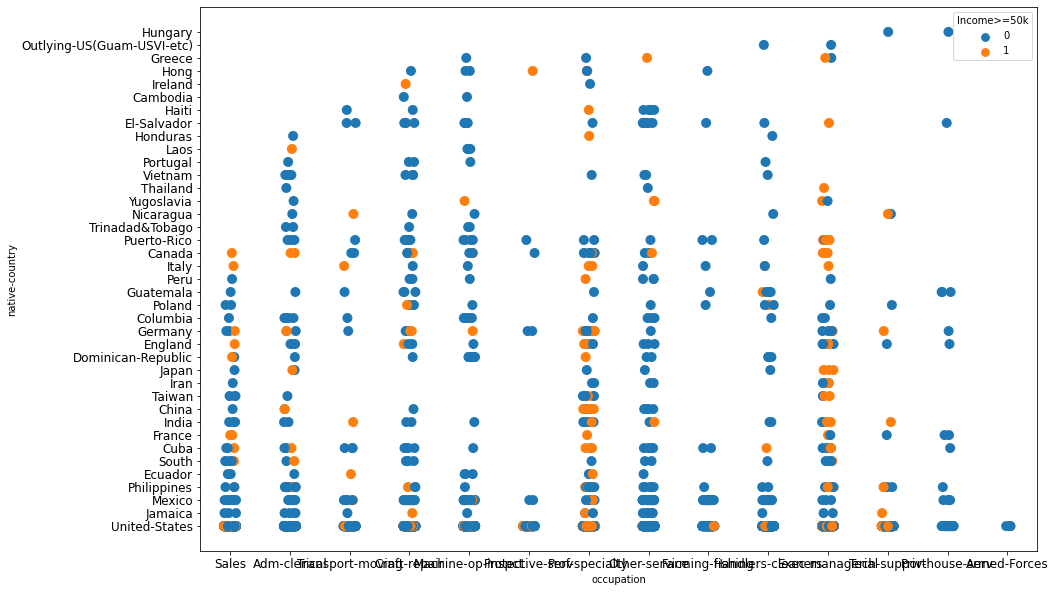

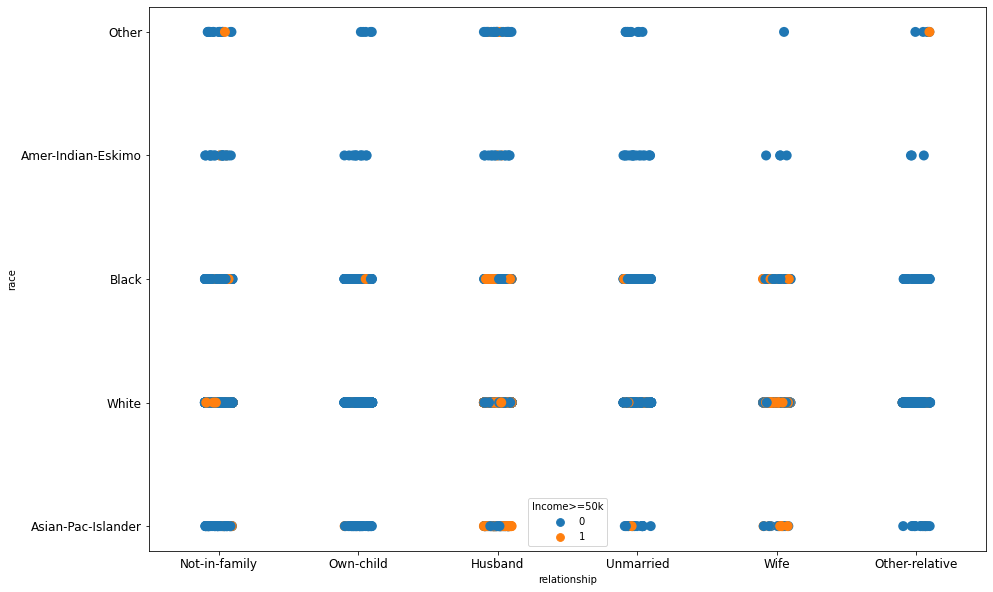

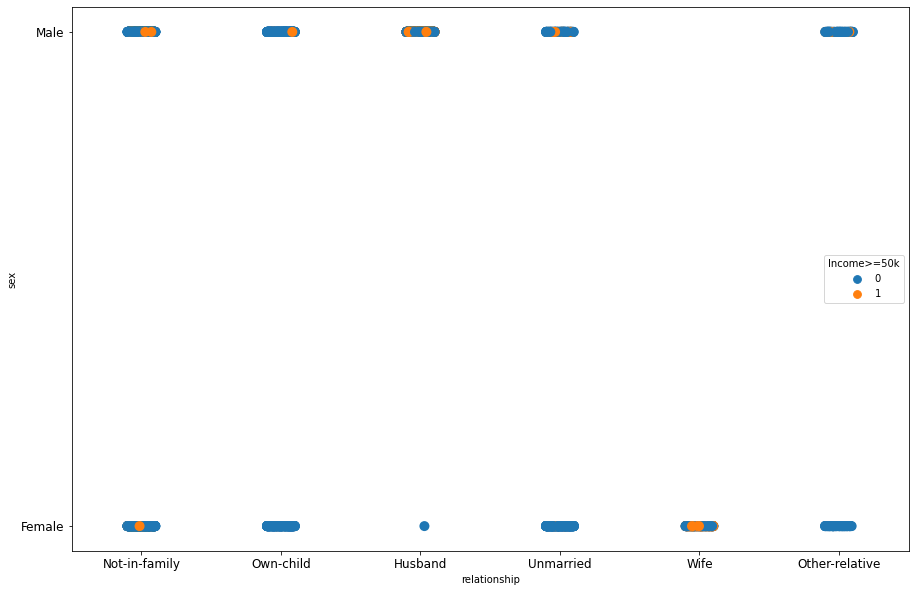

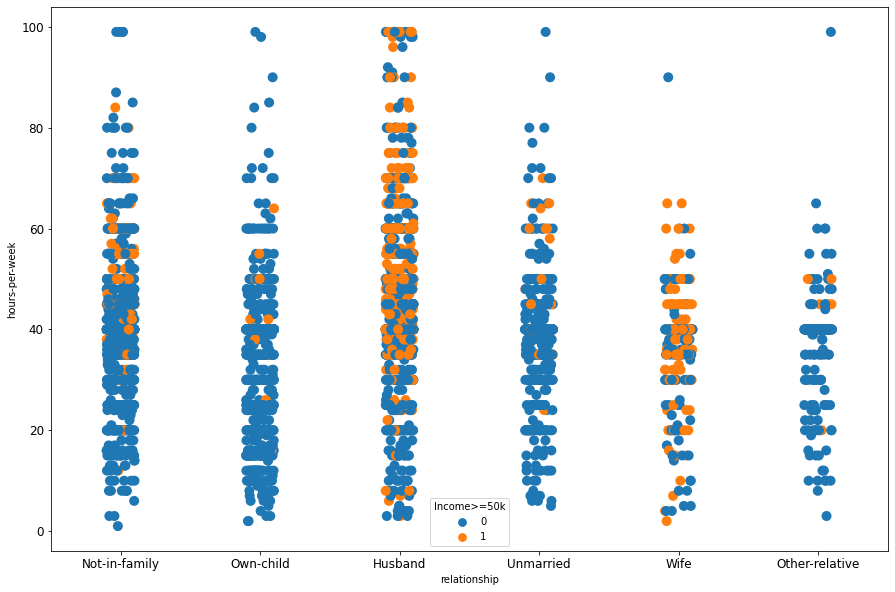

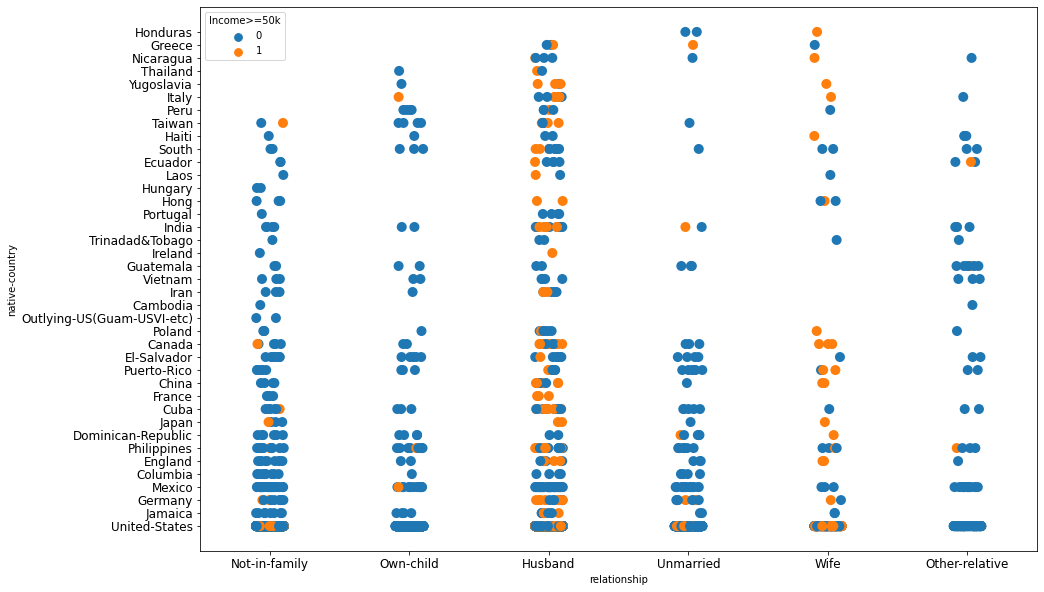

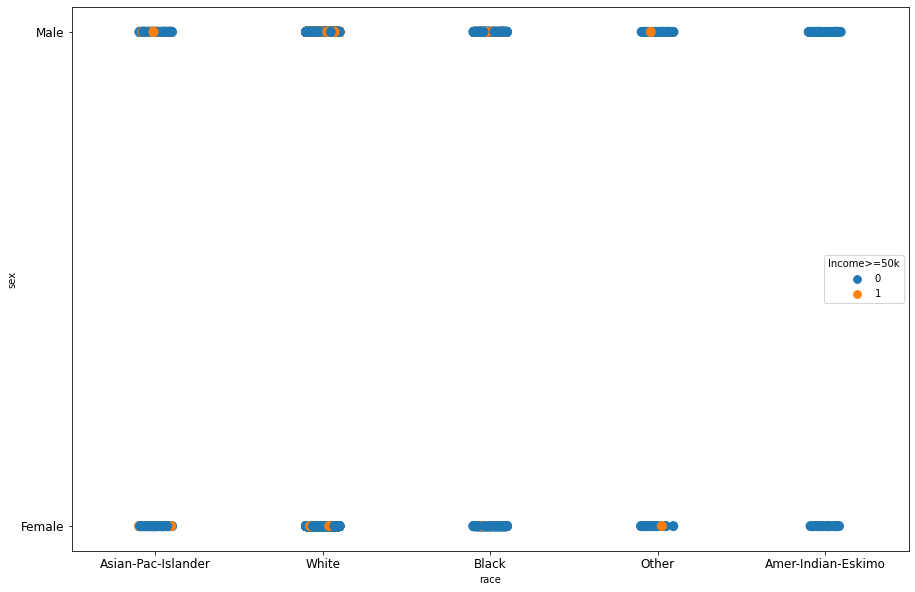

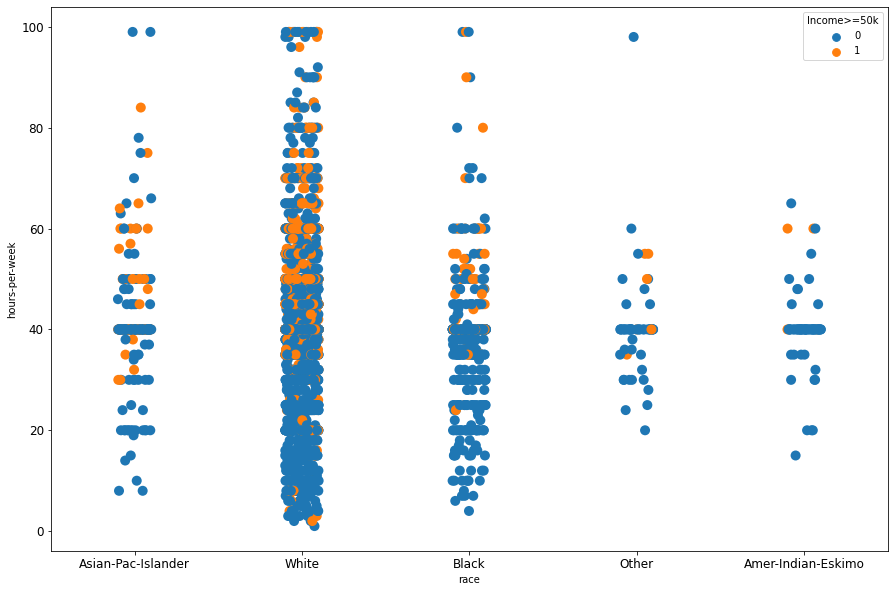

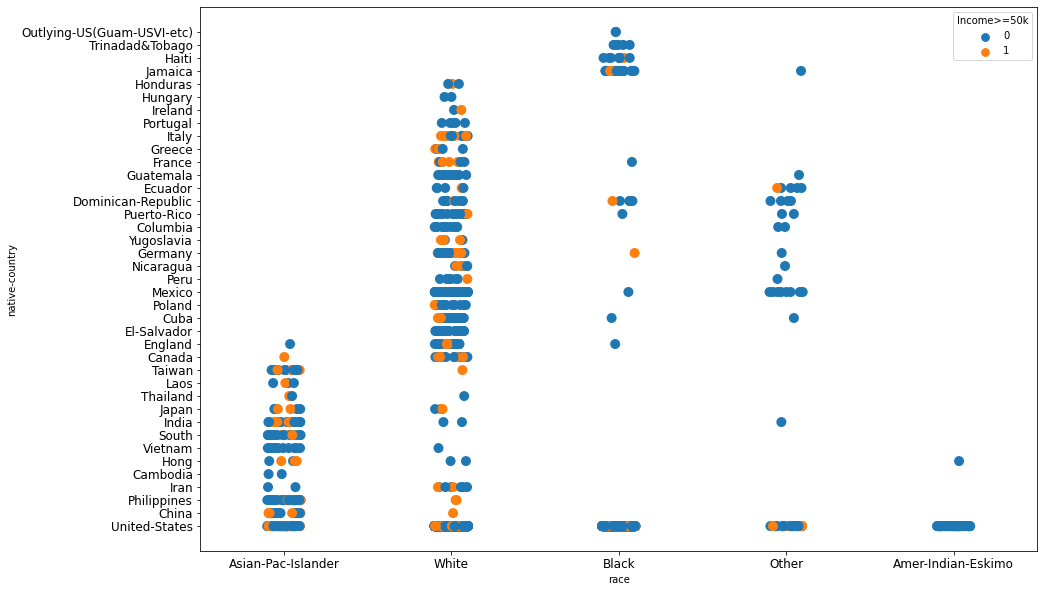

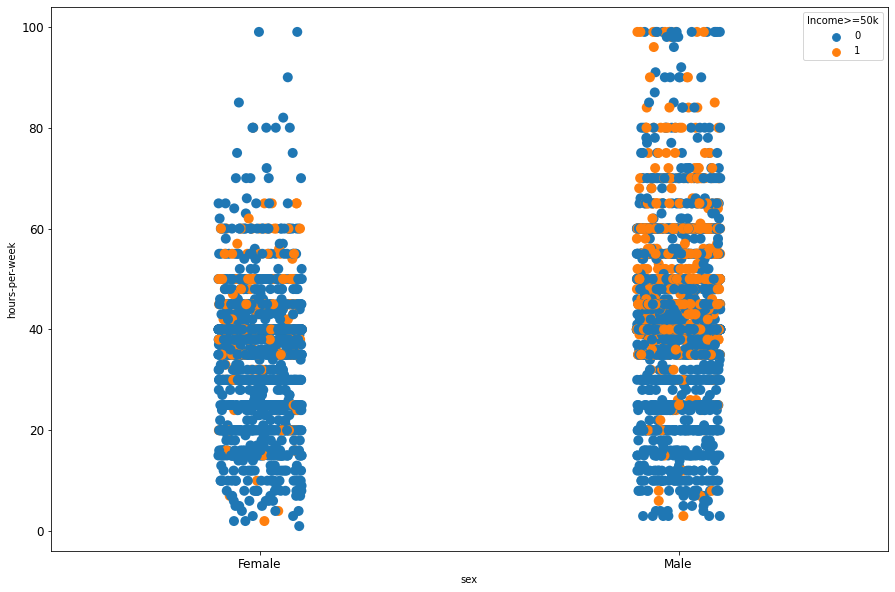

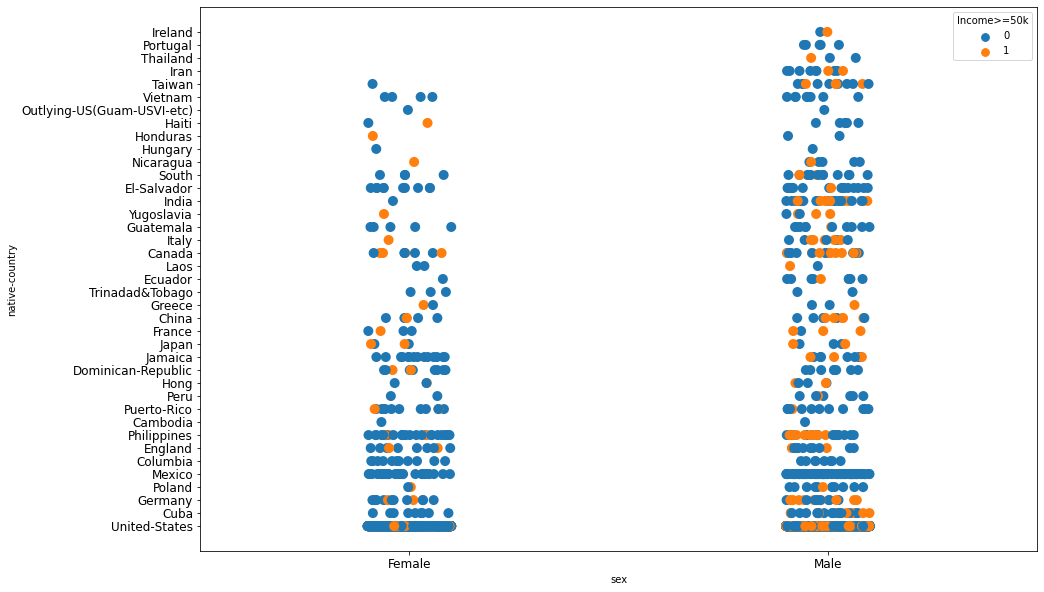

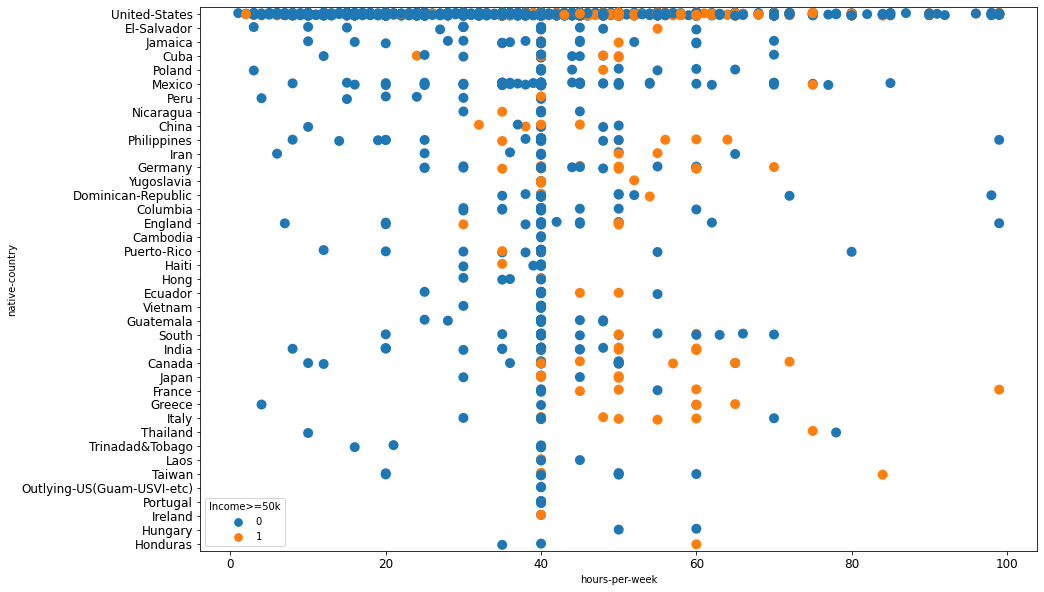

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(len(headers)-1):
    for j in range(i+1, len(headers)-1):
        x_title = headers[i]
        y_title = headers[j]
        plt.figure(figsize=[15, 10])
        ## s = 10 is the label size
        sns.stripplot(x=x_title, y=y_title, hue="Income>=50k", data=X_test_data, s=10)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()